In [12]:
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import numpy as np
import math

In [13]:
def parse(name):
    with open(name) as f:
        content = f.readlines()
    data = [d.strip().split() for d in content]
    data = [[int(s) for s in d] for d in data]
    x, y, w = [], [], []
    for d in data:
        if d[0] < 0 or d[1] < 0:
            continue
        x.append(d[0]+1)
        y.append(d[1]+1)
        w.append(d[2])
    x = np.asarray(x)
    y = np.asarray(y)
    w = np.asarray(w)
    xlog = np.log10(x)
    ylog = np.log10(y)
    return {"raw_x": x, "raw_y": y, "x": xlog, "y": ylog, "w": w}

In [14]:
data = {}
data["deliver"] = parse("deliver_wc_area")
data["read"] = parse("read_wc_area")
data["click"] = parse("url_click_wc_area")
data["spam"] = parse("spam_wc_area")

In [194]:
def plot(title, stats, bins=[100,20,20]):
    H, xedges, yedges = np.histogram2d(stats["x"], stats["y"], weights=stats["w"], bins=bins[0])

    tPlot, ax = plt.subplots(
        nrows=3, ncols=1, sharex=False, sharey=False, 
        gridspec_kw={'height_ratios':[20,5,5],'width_ratios':[1,1,1]}
        )
    tPlot.suptitle(title, x=0.25,fontsize=20)
    tPlot.set_figheight(20)
    tPlot.set_figwidth(30)
    tPlot.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
    
    plot0 = ax[0].imshow(H.T, interpolation='nearest', origin='low',
               extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
               norm=LogNorm()
              )

    ax[0].set_xlabel('Word count 10^x', fontsize=18)
    ax[0].set_ylabel('Image area 10^y', fontsize=18)
    plt.colorbar(plot0,ax=ax[0],fraction=0.06)
    
    
    h1, edges1 = np.histogram(stats["y"], weights=stats["w"], bins=bins[1])
    ax[1].bar(edges1[:-1], h1, width=np.diff(edges1), align='edge', ec="k")
    ax[1].set_xlabel('Image area 10^x', fontsize=18)
    
    h2, edges2 = np.histogram(stats["x"], weights=stats["w"], bins=bins[2])
    ax[2].bar(edges2[:-1], h2, width=np.diff(edges2), align='edge', ec="k")
    ax[2].set_xlabel('Word count  10^x', fontsize=18)
    
    plt.show()
    
def plot_ratios(title, stats1, stats2, bins=[100,20,20]):
    h1, xedges, yedges = np.histogram2d(stats1["x"], stats1["y"], weights=stats1["w"], bins=bins[0])
    h2, xedges, yedges = np.histogram2d(stats2["x"], stats2["y"], weights=stats2["w"], bins=bins[0])
    H = h1 / (h2 + 1)
    
    H = np.array([[c if c <=1 else 0 for c in r] for r in H])


    tPlot, ax = plt.subplots(
        nrows=3, ncols=1, sharex=False, sharey=False, 
        gridspec_kw={'height_ratios':[20,5,5],'width_ratios':[1,1,1]}
        )
    tPlot.suptitle(title, x=0.25,fontsize=20)
    tPlot.set_figheight(20)
    tPlot.set_figwidth(30)
    tPlot.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
    
    plot0 = ax[0].imshow(H.T, interpolation='nearest', origin='low',
               extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
               norm=LogNorm()
              )

    ax[0].set_xlabel('Word count 10^x', fontsize=18)
    ax[0].set_ylabel('Image area 10^y', fontsize=18)
    plt.colorbar(plot0,ax=ax[0],fraction=0.06)
    
    
    h1, edges1 = np.histogram(stats1["y"], weights=stats1["w"], bins=bins[1])
    h2, edges1 = np.histogram(stats2["y"], weights=stats2["w"], bins=bins[1])
    H = h1 / (h2 + 1)
    H1 = np.array([c if c <=1 else 0 for c in H])
        
    ax[1].bar(edges1[:-1], H1, width=np.diff(edges1), align='edge', ec="k")
    ax[1].set_xlabel('Image area 10^x', fontsize=18)
    
    h1, edges2 = np.histogram(stats1["x"], weights=stats1["w"], bins=bins[1])
    h2, edges2 = np.histogram(stats2["x"], weights=stats2["w"], bins=bins[1])
    H = h1 / (h2 + 1)
    H2 = np.array([c if c <=1 else 0 for c in H])
    
    ax[2].bar(edges2[:-1], H2, width=np.diff(edges2), align='edge', ec="k")
    ax[2].set_xlabel('Word count  10^x', fontsize=18)
    
    plt.show()

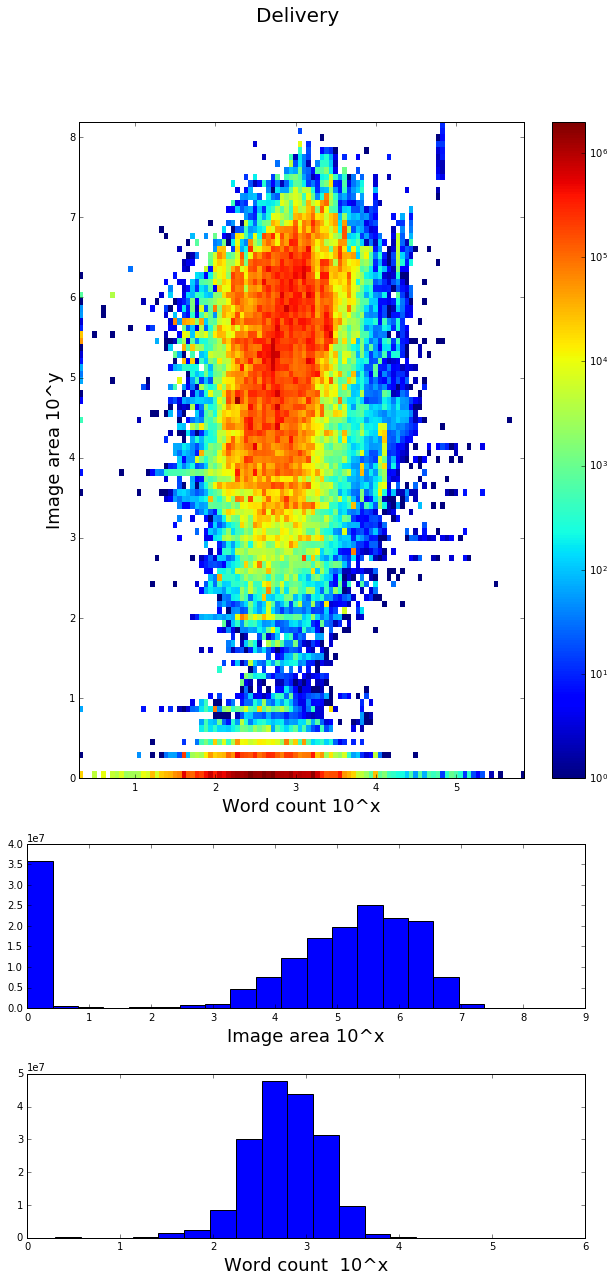

In [195]:
plot("Delivery",data["deliver"],[100,20,20])

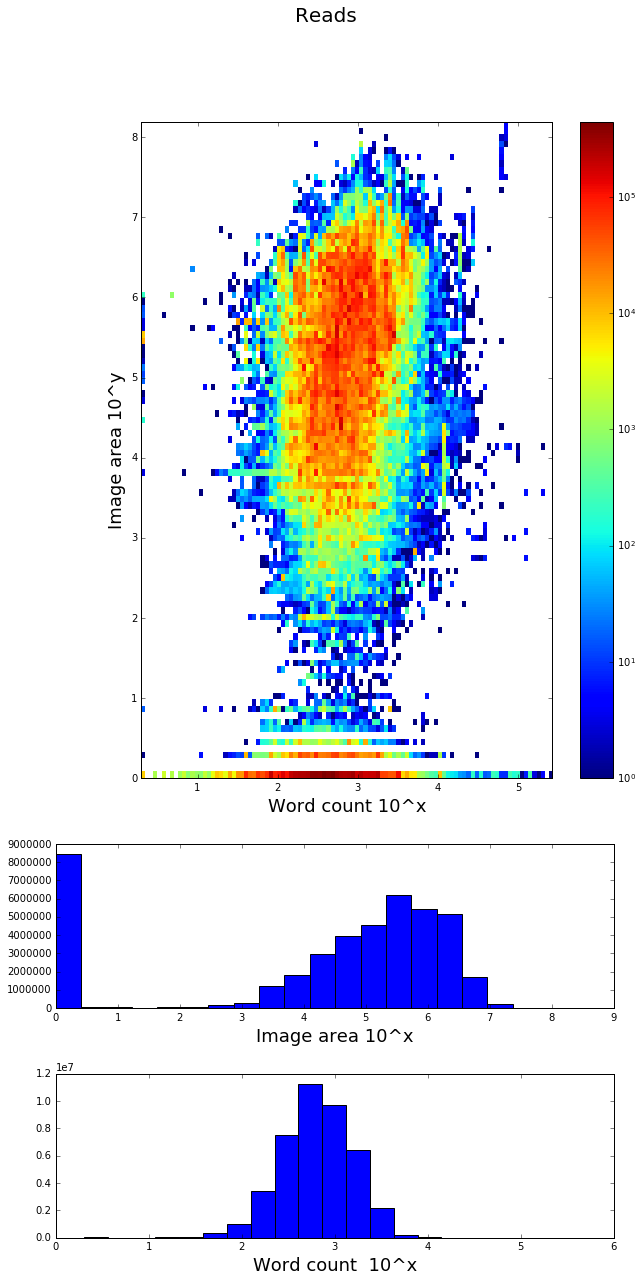

In [186]:
plot("Reads",data["read"],[100,20,20])

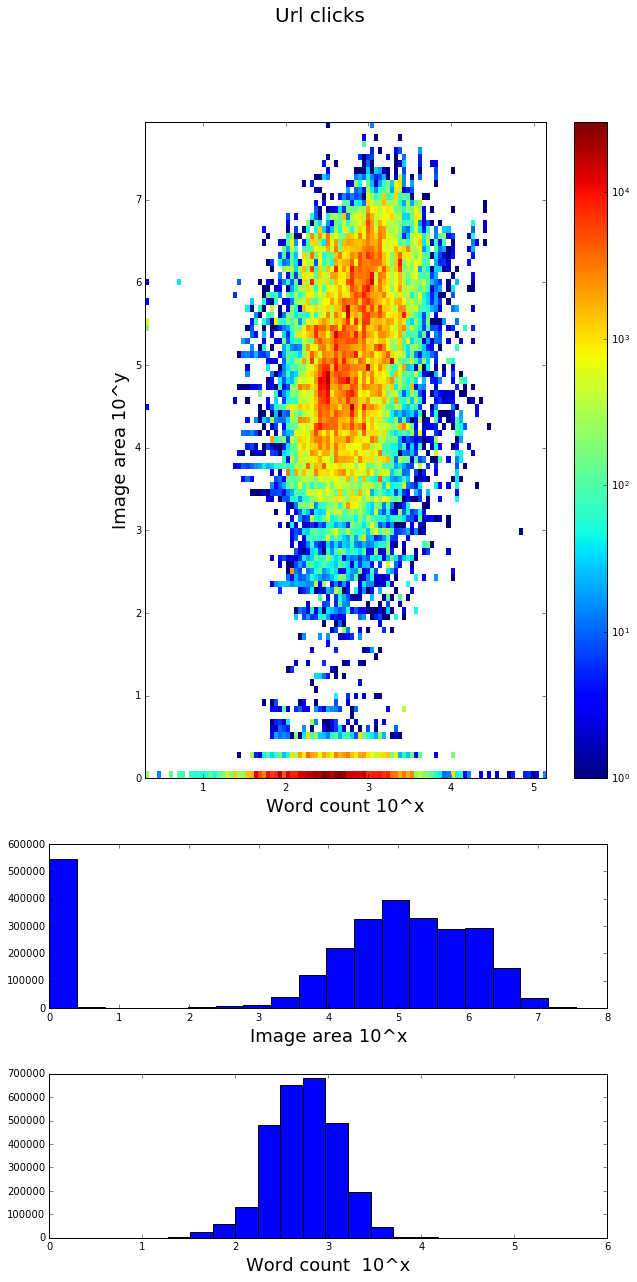

In [187]:
plot("Url clicks",data["click"],[100,20,20])

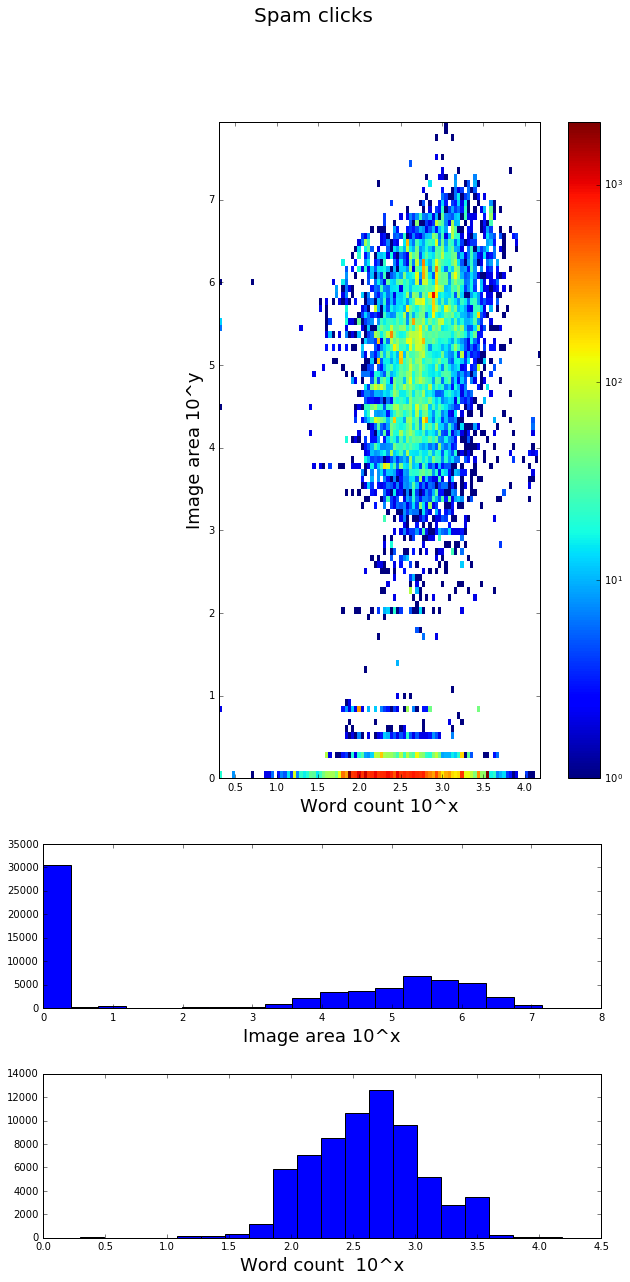

In [188]:
plot("Spam clicks",data["spam"],[100,20,20])

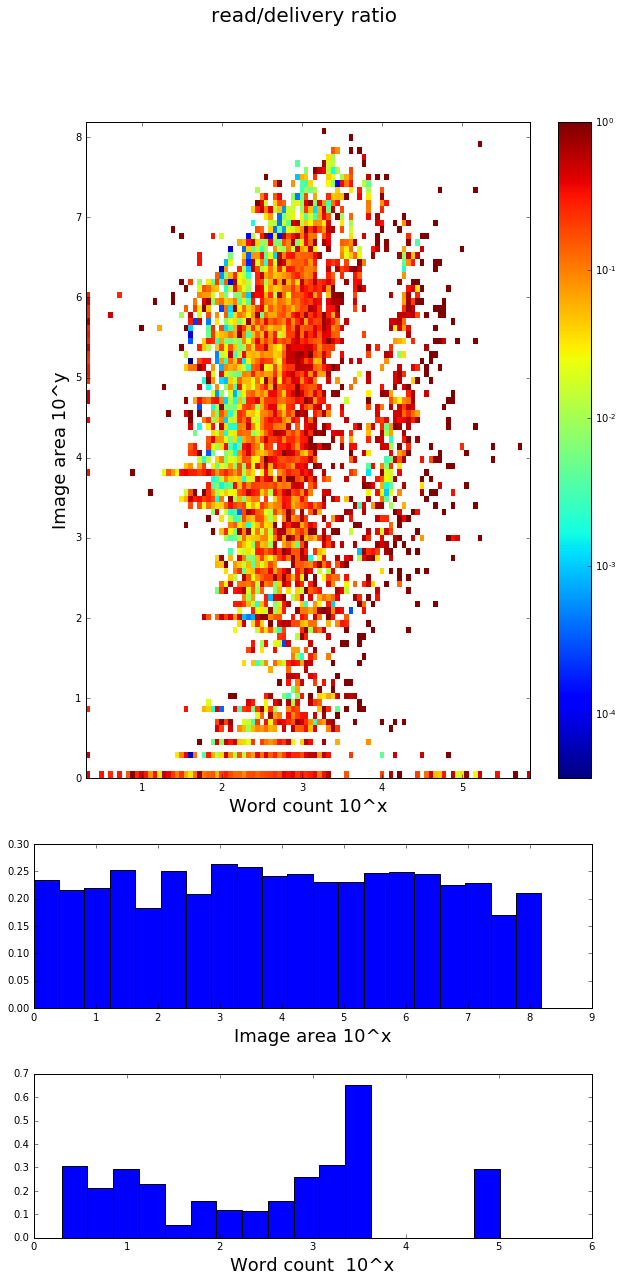

In [189]:
plot_ratios("read/delivery ratio",data["read"],data["deliver"],[100,20,20])

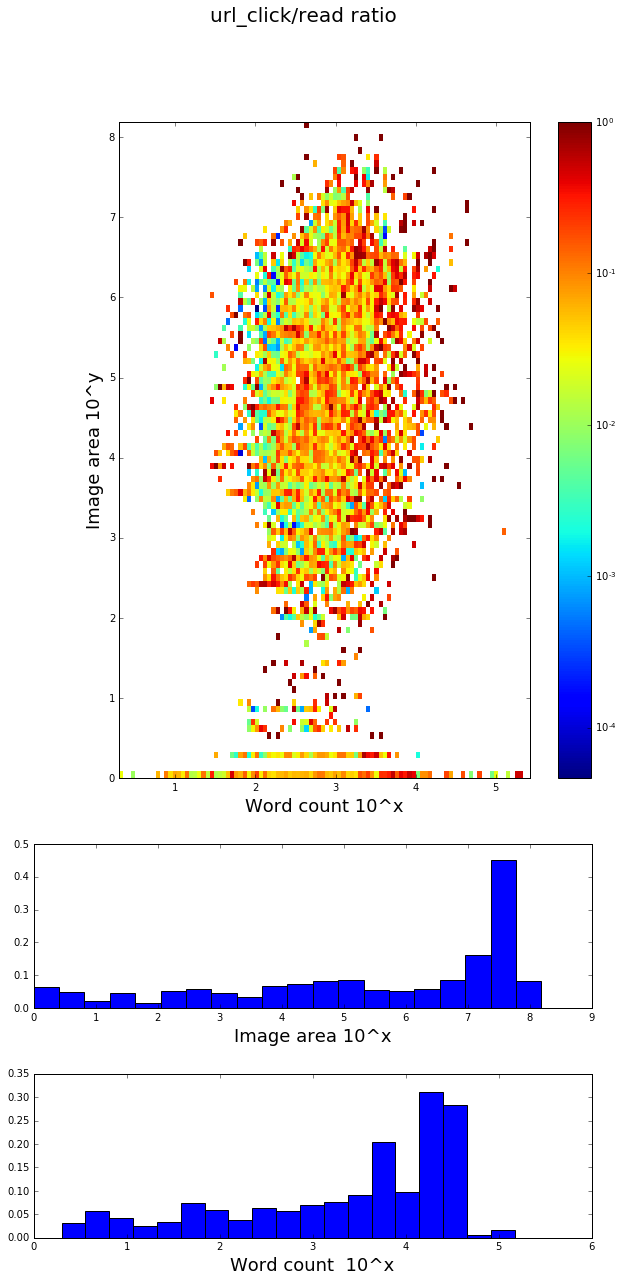

In [190]:
plot_ratios("url_click/read ratio",data["click"],data["read"],[100,20,20])

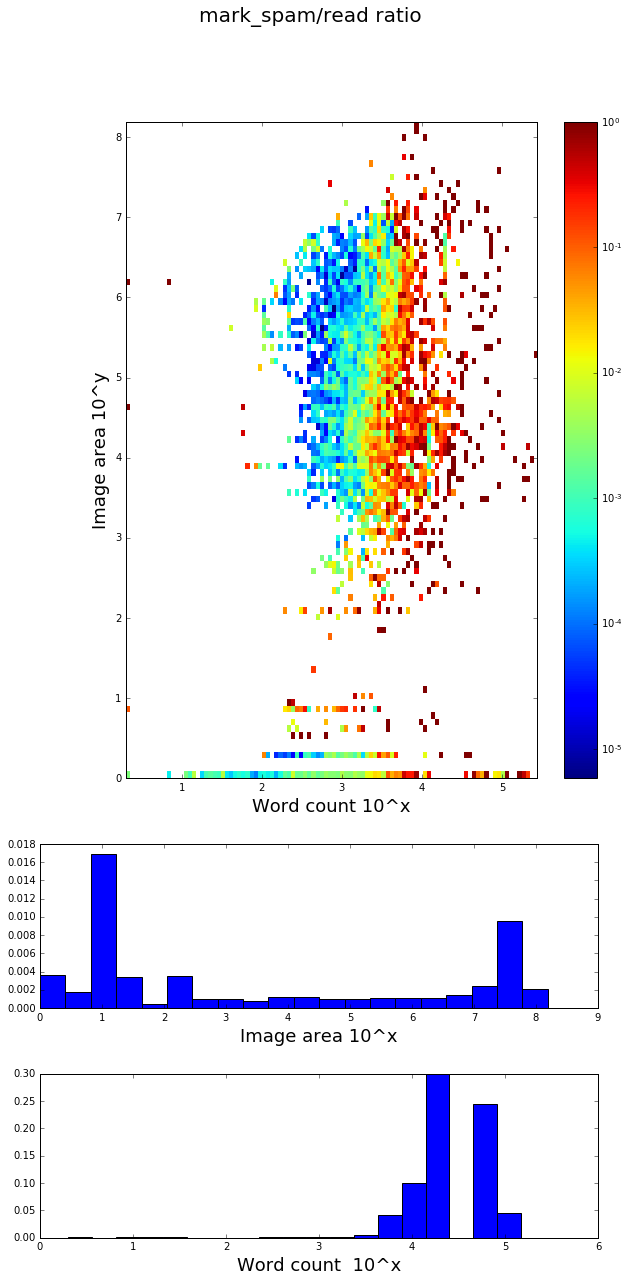

In [191]:
plot_ratios("mark_spam/read ratio",data["spam"],data["read"],[100,20,20])